# Learn Pyspark
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API.

APIs in Pyspark are similar to Pandas and Sciki-learn python pakcages.

PySpark is an all-in-one ecosystem which can handle the aggressive requirements with its MLlib, Structured data processing API, GraphX will definitely of help. Hadoop data can be processed with PySpark, so it will not be of any problem. 

In [1]:
from pyspark import SparkContext
# a key, an entry point of connecting to Spark cluster

In [2]:
sc = SparkContext()
sc.version

'3.0.1'

In [3]:
sc.pythonVer

'3.8'

In [4]:
# URL of the cluster or 'local' string to run in local mode of SparkContext
sc.master

'local[*]'

In [5]:
# Loading data in PySpark
rdd = sc.parallelize([1, 2, 3, 4, 5])

In [6]:
print(type(rdd))

<class 'pyspark.rdd.RDD'>


In [12]:
# Create a python list of numbers from 1 to 100 
numb = range(1, 101)

# Load the list into PySpark  
spark_data = sc.parallelize(numb)

file_path = 'game.txt'
# Load a local file into PySpark shell
lines = sc.textFile(file_path)
print(lines)

game.txt MapPartitionsRDD[11] at textFile at NativeMethodAccessorImpl.java:0


### Functional programming in Python
* lambda function: Very powerful and used in Python. Quite e)cient with map() and filter()
* Use of lambda() with map().  The map() function in Python returns a list of the results after applying the given function to each item of a given iterable (list, tuple etc.). The general syntax of map() function is map(fun, iter). We can also use lambda functions with map(). The general syntax of map() function with lambda() is map(lambda <agument>:<expression>, iter). 

In [8]:
# Print my_list in the console
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print("Input list is", my_list)

# Square all numbers in my_list
squared_list_lambda = list(map(lambda x: x**2, my_list))

# Print the result of the map function
print("The squared numbers are", squared_list_lambda)

my_list2 = [10, 21, 31, 40, 51, 60, 72, 80, 93, 101]
# Print my_list2 in the console
print("Input list is:", my_list2)

# Filter numbers divisible by 10
filtered_list = list(filter(lambda x: (x%10 == 0), my_list2))

# Print the numbers divisible by 10
print("Numbers divisible by 10 are:", filtered_list)

Input list is [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The squared numbers are [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
Input list is: [10, 21, 31, 40, 51, 60, 72, 80, 93, 101]
Numbers divisible by 10 are: [10, 40, 60, 80]


## RDD = Resilient Distributed Datasets
* Simply a collection of data distributed across the cluster. Backbone data type in pyspark
* 3 ways to create RDDs: 1. parallelize() method from lists, 2. textFile() from external files such as HDFS, text file, Amazon S3 bucket, 3. From existing RDDs
* Partitioning in pyspark: a logical division of a large distributed dataset. SparkContext's textFile() method takes an optional second argument called minPartitions for specifying the minimum number of partitions. 

In [9]:
# Create an RDD from a list of words
RDD = sc.parallelize(["Spark", "is", "a", "framework", "for", "Big Data processing"])

# Print out the type of the created object
print("The type of RDD is", type(RDD))

The type of RDD is <class 'pyspark.rdd.RDD'>


In [ ]:
datapath = '...../database/kaggle/coffee/Melbourne_cafe_location/'
filename = 'Cafe_restaurant_bistro_seatsv2.csv'

file_path = datapath + filename
# Print the file_path
print("The file_path is", file_path)

# Create a fileRDD from file_path
fileRDD = sc.textFile(file_path)

# Check the type of fileRDD
print("The file type of fileRDD is", type(fileRDD))

In [11]:
# Check the number of partitions in fileRDD
print("Number of partitions in fileRDD is", fileRDD.getNumPartitions())

# Create a fileRDD_part from file_path with 5 partitions
fileRDD_part = sc.textFile(file_path, minPartitions = 5)

# Check the number of partitions in fileRDD_part
print("Number of partitions in fileRDD_part is", fileRDD_part.getNumPartitions())

Number of partitions in fileRDD is 2
Number of partitions in fileRDD_part is 5


Note that modifying the number of partitions may result in faster performance due to parallelization.

###PySpark operations
* Transformations create new RDDS. Transformations follow Lazy evaluation. Basic RDD Transformations map() , filter() , flatMap() , and union()
* Actions perform computation on the RDDs

In [19]:
# Create a python list of numbers from 1 to 100 
numb = range(1, 11)
# Load the list into PySpark  
numbRDD = sc.parallelize(numb)
copynum = numbRDD
print(id(copynum), id(numbRDD))

# Create map() transformation to cube numbers
cubedRDD = numbRDD.map(lambda x: x**3)

# Collect the results
numbers_all = cubedRDD.collect()

# Print the numbers from numbers_all
for numb in numbers_all:
    print(numb)
    
print(type(numbRDD), type(cubedRDD), type(numbers_all))


140458499211808 140458499211808
1
8
27
64
125
216
343
512
729
1000
<class 'pyspark.rdd.PipelinedRDD'> <class 'pyspark.rdd.PipelinedRDD'> <class 'list'>


collect() should only be used to retrieve results for small datasets. It shouldn’t be used on large datasets.

In [20]:
fileRDD = sc.textFile('game.txt')

# Filter the fileRDD to select lines with Spark keyword
fileRDD_filter = fileRDD.filter(lambda line: 'Rome' in line)
# filter() operation does not mutate the existing fileRDD. 
# Instead, it returns a pointer to an entirely new RDD.

# How many lines are there in fileRDD?
print("The total number of lines with the keyword Rome is", fileRDD_filter.count())

# Print the first four lines of fileRDD
for line in fileRDD_filter.take(4): 
  print(line)

The total number of lines with the keyword Rome is 1
Rome 1960


* An independent example below: -) 

In [25]:
import numpy as np
from pyspark import SparkContext
sc = SparkContext(appName="calculate_pi")

# Pi equals to the area in a circle with r = 1.
def inside(p):
    x, y = np.random.random(), np.random.random()
    return x*x + y*y < 1

NUM_SAMPLES = 1000000  # 1 million
count = sc.parallelize(range(0, NUM_SAMPLES)) \
                .filter(inside).count()
print("P is roughly %f" % (4.0 * count / NUM_SAMPLES))
sc.stop()

P is roughly 3.141120


reduceByKey() transformation merges the values for each key using an associative reduce function.

In [27]:
sc = SparkContext()

# Create PairRDD Rdd with key value pairs
Rdd = sc.parallelize([(1, 2), (3, 4), (3, 6), (4, 5)])

# Apply reduceByKey() operation on Rdd
Rdd_Reduced = Rdd.reduceByKey(lambda x, y: x + y)

# Iterate over the result and print the output
for num in Rdd_Reduced.collect(): 
  print("Key {} has {} Counts".format(num[0], num[1]))

Key 1 has 2 Counts
Key 3 has 10 Counts
Key 4 has 5 Counts


SortByKey and Collect
Many times it is useful to sort the pair RDD based on the key (for example word count which you'll see later in the chapter). In this exercise, you'll sort the pair RDD Rdd_Reduced that you created in the previous exercise into descending order and print the final output.

Remember, you already have a SparkContext sc and Rdd_Reduced available in your workspace.

In [28]:
# Sort the reduced RDD with the key by descending order
Rdd_Reduced_Sort = Rdd_Reduced.sortByKey(ascending=False)

# Iterate over the result and print the output
for num in Rdd_Reduced_Sort.collect():
  print("Key {} has {} Counts".format(num[0], num[1]))

Key 4 has 5 Counts
Key 3 has 10 Counts
Key 1 has 2 Counts


__CountingBykeys__
For many datasets, it is important to count the number of keys in a key/value dataset. For example, counting the number of countries where the product was sold or to show the most popular baby names. In this simple exercise, you'll use the Rdd pair RDD that you created earlier and count the number of unique keys in that pair RDD.

Remember, you already have a SparkContext sc and Rdd available in your workspace.

Remember unlike reduceByKey() and sortByKey(), countByKey() is an action and not a transformation on the pair RDD.

In [ ]:
# Transform the rdd with countByKey()
total = Rdd.countByKey()

# What is the type of total?
print("The type of total is", type(total))

# Iterate over the total and print the output
for k, v in total.items(): 
  print("key", k, "has", v, "counts")

The Shakespeare project as an example
### Create a base RDD and transform it
The volume of unstructured data (log lines, images, binary files) in existence is growing dramatically, and PySpark is an excellent framework for analyzing this type of data through RDDs. In this 3 part exercise, you will write code that calculates the most common words from Complete Works of William Shakespeare.

Here are the brief steps for writing the word counting program:

* Create a base RDD from Complete_Shakespeare.txt file.
* Use RDD transformation to create a long list of words from each element of the base RDD.
* Remove stop words from your data.
* Create pair RDD where each element is a pair tuple of ('w', 1)
* Group the elements of the pair RDD by key (word) and add up their values.
* Swap the keys (word) and values (counts) so that keys is count and value is the word.
* Finally, sort the RDD by descending order and print the 10 most frequent words and their frequencies.

In this first exercise, you'll create a base RDD from Complete_Shakespeare.txt file and transform it to create a long list of words.

In [29]:
file_path = 'Complete_Shakespeare.txt'
# Create a baseRDD from the file path
baseRDD = sc.textFile(file_path)

# Split the lines of baseRDD into words
splitRDD = baseRDD.flatMap(lambda x: x.split(' '))

# Count the total number of words
print("Total number of words in splitRDD:", splitRDD.count())

Total number of words in splitRDD: 1418390


__Remove stop words and reduce the dataset__
After splitting the lines in the file into a long list of words using flatMap() transformation, in the next step, you'll remove stop words from your data. Stop words are common words that are often uninteresting. For example "I", "the", "a" etc., are stop words. You can remove many obvious stop words with a list of your own. But for this exercise, you will just remove the stop words from a curated list stop_words provided to you in your environment.

After removing stop words, you'll next create a pair RDD where each element is a pair tuple (k, v) where k is the key and v is the value. In this example, pair RDD is composed of (w, 1) where w is for each word in the RDD and 1 is a number. Finally, you'll combine the values with the same key from the pair RDD using reduceByKey() operation

Remember you already have a SparkContext sc and splitRDD available in your workspace.

In [52]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
              'ourselves', 'you', 'your', 'yours', 'yourself', 
              'yourselves', 'he', 'him', 'his', 'himself', 
              'she', 'her', 'hers', 'herself', 'it', 'its', 
              'itself', 'they', 'them', 'their', 'theirs', 
              'themselves', 'what', 'which', 'who', 'whom', 'this', 
              'that', 'these', 'those', 'am', 'is', 'are', 'was', 
              'were', 'be', 'been', 'being', 'have', 'has', 'had', 
              'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 
              'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 
              'of', 'at', 'by', 'for', 'with', 'about', 'against', 
              'between', 'into', 'through', 'during', 'before', 'after', 
              'above', 'below', 'to', 'from', 'up', 'down', 'in', 
              'out', 'on', 'off', 'over', 'under', 'again', 'further', 
              'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 
              'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some',
              'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too',
              'very', 'can', 'will', 'just', 'don', 'should', 'now']

In [53]:
# import pandas as pd
# data = pd.read_csv('stop_words.txt', header=None)
# row = data.loc[:, :].values
# stop_words = list(row.reshape(row.shape[1],))
# print(type(stop_words))
# Your list of stop words created this way has a problem...fix it

In [54]:
# Convert the words in lower case and remove stop words from stop_words
splitRDD_no_stop = splitRDD.filter(lambda x: x.lower() not in stop_words)

# Create a tuple of the word and 1 
splitRDD_no_stop_words = splitRDD_no_stop.map(lambda w: (w, 1))

# Count of the number of occurences of each word
resultRDD = splitRDD_no_stop_words.reduceByKey(lambda x, y: x + y)

__Print word frequencies__
After combining the values (counts) with the same key (word), you'll print the word frequencies using the take(N) action. You could have used the collect() action but as a best practice, it is not recommended as collect() returns all the elements from your RDD. You'll use take(N) instead, to return N elements from your RDD.

What if we want to return the top 10 words? For this first, you'll need to swap the key (word) and values (counts) so that keys is count and value is the word. After you swap the key and value in the tuple, you'll sort the pair RDD based on the key (count) and print the top 10 words in descending order.

You already have a SparkContext sc and resultRDD available in your workspace.

In [55]:
# Display the first 10 words and their frequencies
for word in resultRDD.take(10):
    print(word)

# Swap the keys and values 
resultRDD_swap = resultRDD.map(lambda x: (x[1], x[0]))

# Sort the keys in descending order
resultRDD_swap_sort = resultRDD_swap.sortByKey(ascending=False)

# Show the top 10 most frequent words and their frequencies
for word in resultRDD_swap_sort.take(30):
    print("{} ---> {} counts". format(word[1], word[0]))

('Etext', 4)
('presented', 11)
('Project', 13)
('Gutenberg,', 1)
('cooperation', 1)
('World', 5)
('Library,', 2)
('Inc.,', 1)
('Future', 3)
('Shakespeare', 45)
 ---> 517065 counts
thou ---> 4247 counts
thy ---> 3630 counts
shall ---> 3016 counts
good ---> 2046 counts
would ---> 1974 counts
Enter ---> 1926 counts
thee ---> 1780 counts
I'll ---> 1737 counts
hath ---> 1614 counts
like ---> 1453 counts
make ---> 1433 counts
you, ---> 1428 counts
know ---> 1340 counts
upon ---> 1337 counts
may ---> 1326 counts
must ---> 1309 counts
one ---> 1304 counts
let ---> 1287 counts
me, ---> 1214 counts
love ---> 1212 counts
O ---> 1167 counts
see ---> 1085 counts
us ---> 1075 counts
come ---> 1062 counts
th' ---> 1058 counts
say ---> 1050 counts
man ---> 1016 counts
O, ---> 1005 counts
take ---> 966 counts


## RDD to DataFrame
Similar to RDDs, DataFrames are immutable and distributed data structures in Spark. Even though RDDs are a fundamental data structure in Spark, working with data in DataFrame is easier than RDD most of the time and so understanding of how to convert RDD to DataFrame is necessary.

In this exercise, you'll first make an RDD using the sample_list which contains the list of tuples ('Mona',20), ('Jennifer',34),('John',20), ('Jim',26) with each tuple contains the name of the person and their age. Next, you'll create a DataFrame using the RDD and the schema (which is the list of 'Name' and 'Age') and finally confirm the output as PySpark DataFrame.

Remember, you already have a SparkContext sc and SparkSession spark available in your workspace.

In [60]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

# Create a list of tuples
sample_list = [('Mona',20), ('Jennifer',34),('John',20), ('Jim',26)]

# Create a RDD from the list
rdd = sc.parallelize(sample_list)

# Create a PySpark DataFrame
names_df = spark.createDataFrame(rdd, schema=['Name', 'Age'])

# Check the type of names_df
print("The type of names_df is", type(names_df))

The type of names_df is <class 'pyspark.sql.dataframe.DataFrame'>


__Loading CSV into DataFrame__
In the previous exercise, you have seen a method of creating DataFrame but generally, loading data from CSV file is the most common method of creating DataFrames. In this exercise, you'll create a PySpark DataFrame from a people.csv file that is already provided to you as a file_path and confirm the created object is a PySpark DataFrame.

Remember, you already have SparkSession spark and file_path variable (which is the path to the people.csv file) available in your workspace.

In [61]:
# Create an DataFrame from file_path
people_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Check the type of people_df
print("The type of people_df is", type(people_df))

The type of people_df is <class 'pyspark.sql.dataframe.DataFrame'>


__Inspecting data in PySpark DataFrame__
Inspecting data is very crucial before performing analysis such as plotting, modeling, training etc., In this simple exercise, you'll inspect the data in the people_df DataFrame that you have created in the previous exercise using basic DataFrame operators.

Remember, you already have SparkSession spark and people_df DataFrame available in your workspace.

__PySpark DataFrame subsetting and cleaning__
After data inspection, it is often necessary to clean the data which mainly involves subsetting, renaming the columns, removing duplicated rows etc., PySpark DataFrame API provides several operators to do this. In this exercise, your job is to subset 'name', 'sex' and 'date of birth' columns from people_df DataFrame, remove any duplicate rows from that dataset and count the number of rows before and after duplicates removal step.

Remember, you already have SparkSession spark and people_df DataFrames available in your workspace.

In [ ]:
# example do not run
# Print the first 10 observations 
people_df.show(10)

# Count the number of rows 
print("There are {} rows in the people_df DataFrame.".format(people_df.count()))

# Count the number of columns and their names
print("There are {} columns in the people_df DataFrame and their names are {}".format(len(people_df.columns), people_df.columns))

# Select name, sex and date of birth columns
people_df_sub = people_df.select('name', 'sex', 'date of birth')

# Print the first 10 observations from people_df_sub
people_df_sub.show(10)

# Remove duplicate entries from people_df_sub
people_df_sub_nodup = people_df_sub.dropDuplicates()

# Count the number of rows
print("There were {} rows before removing duplicates, and {} rows after removing duplicates".format(people_df_sub.count(), people_df_sub_nodup.count()))

__Filtering your DataFrame__
In the previous exercise, you have subset the data using select() operator which is mainly used to subset the DataFrame column-wise. What if you want to subset the DataFrame based on a condition (for example, select all rows where the sex is Female). In this exercise, you will filter the rows in the people_df DataFrame in which 'sex' is female and male and create two different datasets. Finally, you'll count the number of rows in each of those datasets.

Remember, you already have SparkSession spark and people_df DataFrame available in your workspace.

In [ ]:
# Filter people_df to select females 
people_df_female = people_df.filter(people_df.sex == "female")

# Filter people_df to select males
people_df_male = people_df.filter(people_df.sex == "male")

# Count the number of rows 
print("There are {} rows in the people_df_female DataFrame and {} rows in the people_df_male DataFrame".format(people_df_female.count(), people_df_male.count()))

__Running SQL Queries Programmatically__
DataFrames can easily be manipulated using SQL queries in PySpark. The sql() function on a SparkSession enables applications to run SQL queries programmatically and returns the result as another DataFrame. In this exercise, you'll create a temporary table of the people_df DataFrame that you created previously, then construct a query to select the names of the people from the temporary table and assign the result to a new DataFrame.

Remember, you already have SparkSession spark and people_df DataFrame available in your workspace.

In [ ]:
# Create a temporary table "people"
people_df.createOrReplaceTempView("people")

# Construct a query to select the names of the people from the temporary table "people"
query = '''SELECT name FROM people'''

# Assign the result of Spark's query to people_df_names
people_df_names = spark.sql(query)

# Print the top 10 names of the people
people_df_names.show(10)

Good job on running your first SQL query successfully!!! Spark SQL operations generally return DataFrames. This means you can freely mix DataFrames and SQL.

__SQL queries for filtering Table__
In the previous exercise, you have run a simple SQL query on a DataFrame. There are more sophisticated queries you can construct to obtain the result that you want and use it for downstream analysis such as data visualization and Machine Learning. In this exercise, we will use the temporary table people that you created previously and filter out the rows where the "sex" is male and female and create two DataFrames.

Remember, you already have SparkSession spark and people temporary table available in your workspace.

In [ ]:
# Filter the people table to select female sex 
people_female_df = spark.sql('SELECT * FROM people WHERE sex=="female"')

# Filter the people table DataFrame to select male sex
people_male_df = spark.sql('SELECT * FROM people WHERE sex=="male"')

# Count the number of rows in both DataFrames
print("There are {} rows in the people_female_df and {} rows in the people_male_df DataFrames".format(people_female_df.count(), people_male_df.count()))

Now that you have used filter() with both Dataframe API and SQL query. Which one do you prefer?

__PySpark DataFrame visualization__
Graphical representations or visualization of data is imperative for understanding as well as interpreting the data. In this simple data visualization exercise, you'll first print the column names of names_df DataFrame that you created earlier, then convert the names_df to Pandas DataFrame and finally plot the contents as horizontal bar plot with names of the people on the x-axis and their age on the y-axis.

Remember, you already have SparkSession spark and names_df DataFrame available in your workspace.

In [ ]:
# Check the column names of names_df
print("The column names of names_df are", names_df.columns)

# Convert to Pandas DataFrame  
df_pandas = names_df.toPandas()

# Create a horizontal bar plot
df_pandas.plot(kind='barh', x='Name', y='Age', colormap='winter_r')
plt.show()

## Case example: Create a DataFrame from CSV file
Every 4 years, the soccer fans throughout the world celebrates a festival called “Fifa World Cup” and with that, everything seems to change in many countries. In this 3 part exercise, you'll be doing some exploratory data analysis (EDA) on the "FIFA 2018 World Cup Player" dataset using PySpark SQL which involve DataFrame operations, SQL queries and visualization.

In the first part, you'll load FIFA 2018 World Cup Players dataset (Fifa2018_dataset.csv) which is in CSV format into a PySpark's dataFrame and inspect the data using basic DataFrame operations.

Remember, you already have SparkSession spark and file_path variable (which is the path to the Fifa2018_dataset.csv file) available in your workspace.

In [ ]:
# Load the Dataframe
fifa_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Check the schema of columns
fifa_df.printSchema()

# Show the first 10 observations
fifa_df.show(10)

# Print the total number of rows
print("There are {} rows in the fifa_df DataFrame".format(fifa_df.count()))
#     There are 17981 rows in the fifa_df DataFrame

### Part 2: SQL Queries on DataFrame
The fifa_df DataFrame that we created has additional information about datatypes and names of columns associated with it. This additional information allows PySpark SQL to run SQL queries on DataFrame. SQL queries are concise and easy to run compared to DataFrame operations. But in order to apply SQL queries on DataFrame first, you need to create a temporary view of DataFrame as a table and then apply SQL queries on the created table (Running SQL Queries Programmatically).

In the second part, you'll create a temporary table of fifa_df DataFrame and run SQL queries to extract the 'Age' column of players from Germany.

You already have a SparkContext spark and fifa_df available in your workspace.
Notice how consise SQL queries are compared to DataFrame operations.

In [ ]:
# Create a temporary view of fifa_df
fifa_df.createOrReplaceTempView('fifa_df_table')

# Construct the "query"
query = '''SELECT Age FROM fifa_df_table WHERE Nationality == "Germany"'''

# Apply the SQL "query"
fifa_df_germany_age = spark.sql(query)

# Generate basic statistics
fifa_df_germany_age.describe().show()

### Part 3: Data visualization
Data visualization is important for exploratory data analysis (EDA). PySpark DataFrame is a perfect for data visualization compared to RDDs because of its inherent structure and schema.

In this third part, you'll create a histogram of the ages of all the players from Germany from the DataFrame that you created in the previous exercise. For this, you'll first convert the PySpark DataFrame into Pandas DataFrame and use matplotlib's plot() function to create a density plot of ages of all players from Germany.

Remember, you already have SparkSession spark, fifa_df_table temporary table and fifa_df_germany_age DataFrame available in your workspace.

Great job on successfully performing Exploratory Data Analysis on PySpark DataFrame using DataFrame operations, SQL queries and visualization!

In [ ]:
# Convert fifa_df to fifa_df_germany_age_pandas DataFrame
fifa_df_germany_age_pandas = fifa_df_germany_age.toPandas()

# Plot the 'Age' density of Germany Players
fifa_df_germany_age_pandas.plot(kind='density')
plt.show()

## PySpark MLlib
pyspark.mllib can only support RDDs unless you change DataFrames to RDDs.
It is the builtin library for RDD-based API.

### PySpark MLlib algorithms
Before using any Machine learning algorithms in PySpark shell, you'll have to import the submodules of pyspark.mllib library and then choose the appropriate class that is needed for a specific machine learning task.

In this simple exercise, you'll learn how to import the different submodules of pyspark.mllib along with the classes that are needed for performing Collaborative filtering, Classification and Clustering algorithms.

In [63]:
# Import the library for ALS 
# Import pyspark.mllib recommendation submodule and Alternating Least Squares class.
from pyspark.mllib.recommendation import ALS

# Import the library for Logistic Regression
# Import pyspark.mllib classification submodule and Logistic Regression with LBFGS class.
from pyspark.mllib.classification import LogisticRegressionWithLBFGS

# Import the library for Kmeans
# Import pyspark.mllib clustering submodule and kmeans class.
from pyspark.mllib.clustering import KMeans

## Case study
### Loading Movie Lens dataset into RDDs
Collaborative filtering is a technique for recommender systems wherein users' ratings and interactions with various products are used to recommend new ones. With the advent of Machine Learning and parallelized processing of data, Recommender systems have become widely popular in recent years, and are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags. In this 3-part exercise, your goal is to develop a simple movie recommendation system using PySpark MLlib using a subset of MovieLens 100k dataset (https://grouplens.org/datasets/movielens/100k/).

In the first part, you'll first load the MovieLens data (ratings.csv) into RDD and from each line in the RDD which is formatted as userId,movieId,rating,timestamp, you'll need to map the MovieLens data to a Ratings object (userID, productID, rating) after removing timestamp column and finally you'll split the RDD into training and test RDDs.

Remember, you have a SparkContext sc available in your workspace. Also file_path variable (which is the path to the ratings.csv file), and ALS class are already available in your workspace.

In [ ]:
# Load the data into RDD
data = sc.textFile(file_path)

# Split the RDD 
ratings = data.map(lambda l: l.split(','))

# Transform the ratings RDD 
ratings_final = ratings.map(lambda line: Rating(int(line[0]), int(line[1]), float(line[2])))

# Split the data into training and test
training_data, test_data = ratings_final.randomSplit([0.8, 0.2])

Good job with preprocessing the data. It's time to train the ALS model!

### Model training and predictions
After splitting the data into training and test data, in the second part of the exercise, you'll train the ALS algorithm using the training data. PySpark MLlib's ALS algorithm has the following mandatory parameters - rank (the number of latent factors in the model) and iterations (number of iterations to run). After training the ALS model, you can use the model to predict the ratings from the test data. For this, you will provide the user and item columns from the test dataset and finally print the first 2 rows of predictAll() output.

Remember, you have SparkContext sc, training_data and test_data are already available in your workspace.

Alternating Least Squares (ALS) algorithm in spark.mllib provides collaborative  ltering.

In [ ]:
# Create the ALS model on the training data
model = ALS.train(training_data, rank=10, iterations=10)

# Drop the ratings column 
testdata_no_rating = test_data.map(lambda p: (p[0], p[1]))

# Predict the model  
predictions = model.predictAll(testdata_no_rating)

# Print the first rows of the RDD
predictions.take(2)

<!-- 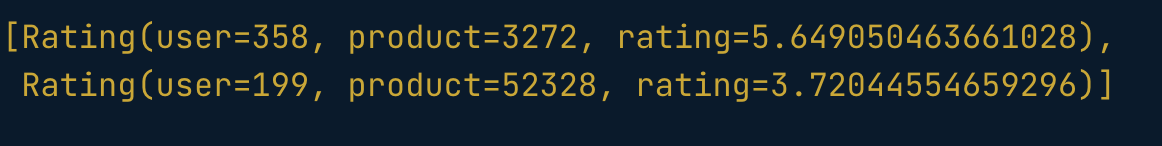 -->
<div>
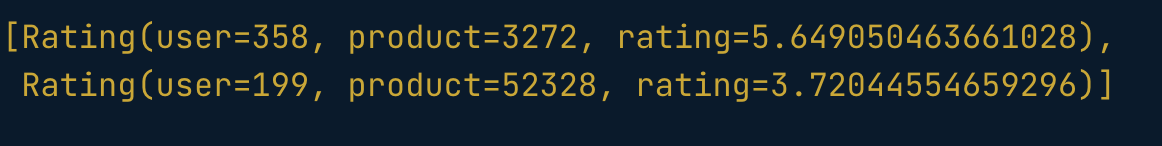
</div>

### Model evaluation using MSE
After generating the predicted ratings from the test data using ALS model, in this final part of the exercise, you'll prepare the data for calculating Mean Square Error (MSE) of the model. The MSE is the average value of (original rating – predicted rating)^2 for all users and indicates the absolute fit of the model to the data. To do this, first, you'll organize both the ratings and prediction RDDs to make a tuple of ((user, product), rating)), then join the ratings RDD with prediction RDD and finally apply a squared difference function along with mean() to get the MSE.

Remember, you have a SparkContext sc available in your workspace. Also, ratings_final and predictions RDD are already available in your workspace.

In [ ]:
# Prepare ratings data
rates = ratings_final.map(lambda r: ((r[0], r[1]), r[2]))

# Prepare predictions data
preds = predictions.map(lambda r: ((r[0], r[1]), r[2]))

# Join the ratings data with predictions data
rates_and_preds = rates.join(preds)

# Calculate and print MSE
MSE = rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
print("Mean Squared Error of the model for the test data = {:.2f}".format(MSE))

Hurray! You have successfully created a Movie Recommendation System using Apache Spark.

## Case study
### Loading spam and non-spam data
Logistic Regression is a popular method to predict a categorical response. Probably one of the most common applications of the logistic regression is the message or email spam classification. In this 3-part exercise, you'll create an email spam classifier with logistic regression using Spark MLlib. Here are the brief steps for creating a spam classifier.

Create an RDD of strings representing email.
Run MLlib’s feature extraction algorithms to convert text into an RDD of vectors.
Call a classification algorithm on the RDD of vectors to return a model object to classify new points.
Evaluate the model on a test dataset using one of MLlib’s evaluation functions.
In the first part of the exercise, you'll load the 'spam' and 'ham' (non-spam) files into RDDs, split the emails into individual words and look at the first element in each of the RDD.

Remember, you have a SparkContext sc available in your workspace. Also file_path_spam variable (which is the path to the 'spam' file) and file_path_non_spam (which is the path to the 'non-spam' file) is already available in your workspace.

In [ ]:
# Load the datasets into RDDs
spam_rdd = sc.textFile(file_path_spam)
non_spam_rdd = sc.textFile(file_path_non_spam)

# Split the email messages into words
spam_words = spam_rdd.flatMap(lambda email: email.split(' '))
non_spam_words = non_spam_rdd.flatMap(lambda email: email.split(' '))

# Print the first element in the split RDD
print("The first element in spam_words is", spam_words.take(1))
print("The first element in non_spam_words is", non_spam_words.take(1))
print("The first element in spam_words is", spam_words.first())
print("The first element in non_spam_words is", non_spam_words.first())

fyi: if use map instead of flatMap above, you get this
>The first element in spam_words is [['You', 'have', '1', 'new', 'message.', 'Please', 'call', '08712400200.']]

if using map:
>The first element in spam_words is ['You']

if using .first:
>The first element in spam_words is You

### Feature hashing and LabelPoint
After splitting the emails into words, our raw data set of 'spam' and 'non-spam' is currently composed of 1-line messages consisting of spam and non-spam messages. In order to classify these messages, we need to convert text into features.

In the second part of the exercise, you'll first create a HashingTF() instance to map text to vectors of 200 features, then for each message in 'spam' and 'non-spam' files you'll split them into words, and each word is mapped to one feature. These are the features that will be used to decide whether a message is 'spam' or 'non-spam'. Next, you'll create labels for features. For a valid message, the label will be 0 (i.e. the message is not spam) and for a 'spam' message, the label will be 1 (i.e. the message is spam). Finally, you'll combine both the labeled datasets.

Remember, you have a SparkContext sc available in your workspace. Also spam_words and non_spam_words variables are already available in your workspace.

Feature hashing and LabeledPoints are quite powerful for text based classification in PySpark MLlib!

In [ ]:
from pyspark.mllib.feature import HashingTF
# Create a HashingTf instance with 200 features
tf = HashingTf(numFeatures=200)

# Map each word to one feature
spam_features = tf.transform(spam_words)
non_spam_features = tf.transform(non_spam_words)

# Label the features: 1 for spam, 0 for non-spam
spam_samples = spam_features.map(lambda features:LabeledPoint(1, features))
non_spam_samples = non_spam_features.map(lambda features:LabeledPoint(0, features))

# Combine the two datasets
samples = spam_samples.join(non_spam_samples)

### Logistic Regression model training
After creating labels and features for the data, we’re ready to build a model that can learn from it (training). But before you train the model, you'll split the combined dataset into training and testing dataset because it can assign a probability of being spam to each data point. We can then decide to classify messages as spam or not, depending on how high the probability.

In this final part of the exercise, you'll split the data into training and test, run Logistic Regression on the training data, apply the same HashingTF() feature transformation to get vectors on a positive example (spam) and a negative one (non-spam) and finally check the accuracy of the model trained.

Remember, you have a SparkContext sc available in your workspace, as well as the samples variable.

In [ ]:
# Split the data into training and testing
train_samples,test_samples = samples.randomSplit([0.8, 0.2])

# Train the model
model = LogisticRegressionWithLBFGS.train(train_samples)

# Create a prediction label from the test data
predictions = model.predict(test_samples.map(lambda x: x.features))

# Combine original labels with the predicted labels
labels_and_preds = test_samples.map(lambda x: x.label).zip(predictions)

# Check the accuracy of the model on the test data
accuracy = labels_and_preds.filter(lambda x: x[0] == x[1]).count() / float(test_samples.count())
print("Model accuracy : {:.2f}".format(accuracy))

Model accuracy : 0.74
You sucessfully created a spam classifier in just a few steps. Your classifier predicted about 80% of the labels correctly. Can you think of a way to improve this accuracy?

## Case Study: clustering
### Loading and parsing the 5000 points data
Clustering is the unsupervised learning task that involves grouping objects into clusters of high similarity. Unlike the supervised tasks, where data is labeled, clustering can be used to make sense of unlabeled data. PySpark MLlib includes the popular K-means algorithm for clustering. In this 3 part exercise, you'll find out how many clusters are there in a dataset containing 5000 rows and 2 columns. For this you'll first load the data into an RDD, parse the RDD based on the delimiter, run the KMeans model, evaluate the model and finally visualize the clusters.

In the first part, you'll load the data into RDD, parse the RDD based on the delimiter and convert the string type of the data to an integer.

Remember, you have a SparkContext sc available in your workspace. Also file_path variable (which is the path to the 5000_points.txt file) is already available in your workspace.

In [ ]:
# Load the dataset into a RDD
clusterRDD = sc.textFile(file_path)

# Split the RDD based on tab
rdd_split = clusterRDD.map(lambda x: x.split('\t'))

# Transform the split RDD by creating a list of integers
rdd_split_int = rdd_split.map(lambda x: [int(x[0]), int(x[1])])

# Count the number of rows in RDD 
print("There are {} rows in the rdd_split_int dataset".format(rdd_split_int.count()))

### K-means training
Now that the RDD is ready for training, in the second part of the exercise, you'll train the RDD with PySpark's MLlib's KMeans algorithm. The algorithm is somewhat naive--it clusters the data into k clusters, even if k is not the right number of clusters to use. Therefore, when using k-means clustering, the most important parameter is a target number of clusters to generate, k. In practice, you rarely know the “true” number of clusters in advance, so the best practice is to try several values of k until the average intracluster distance stops decreasing dramatically

In this 2nd part, you'll test with k's ranging from 13 to 16 and use the elbow method to chose the correct k. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k, calculate Within Set Sum of Squared Error (WSSSE, this function is already provided to you) and select the best k based on the sudden drop in WSSSE. Finally, you'll retrain the model with the best k (15 in this case) and print the centroids (cluster centers).

Remember, you already have a SparkContext sc and rdd_split_int RDD available in your workspace.

In [ ]:
from math import sqrt
def error(point):
    center = model.centers[model.predict(point)]
return sqrt(sum([x**2 for x in (point - center)]))

# Train the model with clusters from 13 to 16 and compute WSSSE 
for clst in range(13, 17):
    model = KMeans.train(rdd_split_int, clst, seed=1)
    WSSSE = rdd_split_int.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("The cluster {} has Within Set Sum of Squared Error {}".format(clst, WSSSE))

# Train the model again with the best k 
model = KMeans.train(rdd_split_int, k=15, seed=1)

# Get cluster centers
cluster_centers = model.clusterCenters

* The cluster 13 has Within Set Sum of Squared Error 249164132.49410182
* The cluster 14 has Within Set Sum of Squared Error 209371154.24941802
* The cluster 15 has Within Set Sum of Squared Error 169394691.52639425
* The cluster 16 has Within Set Sum of Squared Error 202384225.6640126
Great job on finding the best K with K-Means algorithm! For real world data, you should train the model with a wide range of K values.

### Visualizing clusters
After KMeans model training with an optimum K value (K = 15), in this final part of the exercise, you will visualize the clusters and their cluster centers (centroids) and see if they overlap with each other. For this, you'll first convert rdd_split_int RDD into spark DataFrame and then into Pandas DataFrame for plotting. Similarly, you'll convert cluster_centers into Pandas DataFrame. Once the DataFrames are created, you'll use matplotlib library to create scatter plots.

Remember, you already have a SparkContext sc, rdd_split_int and cluster_centers variables available in your workspace.

In [ ]:
# Convert rdd_split_int RDD into Spark DataFrame
rdd_split_int_df = spark.createDataFrame(rdd_split_int, schema=["col1", "col2"])

# Convert Spark DataFrame into Pandas DataFrame
rdd_split_int_df_pandas = rdd_split_int_df.toPandas()

# Convert "cluster_centers" that you generated earlier into Pandas DataFrame
cluster_centers_pandas = pd.DataFrame(cluster_centers, columns=["col1", "col2"])

# Create an overlaid scatter plot
plt.scatter(rdd_split_int_df_pandas["col1"], rdd_split_int_df_pandas["col2"])
plt.scatter(cluster_centers_pandas["col1"], cluster_centers_pandas["col2"], color="red", marker="x")
plt.show()

<!-- 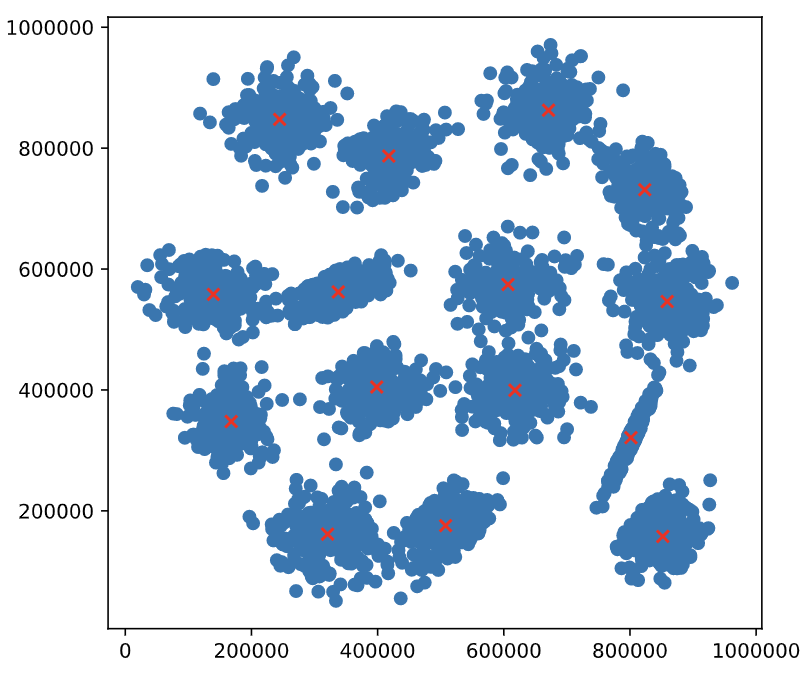 -->
<div>
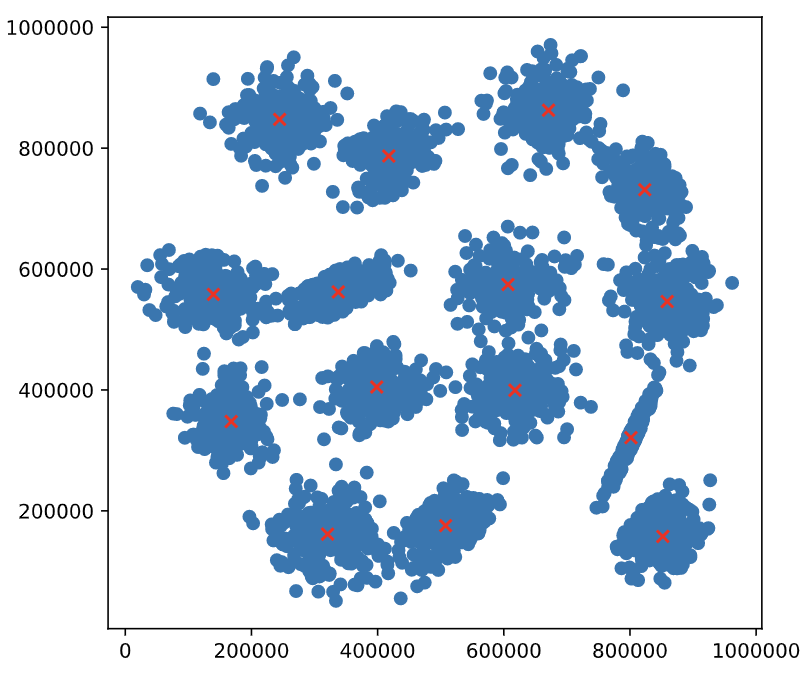
</div>
